# Example 6. Nonlinear regression - Polynomial
---

In real case of data, sometime the correlation within the features can be nonlinear. In ideal case, the correlation may can be **polynomial** as 

$$
y=w_0+w_1x+w_2x^2+w_3x^3+\dots+w_dx^d
$$

The alternative way to achive the regression is applying the projection matrix to transfer the curret feature space to another one where the new features are linear correlated. 

### 1. Simple example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# create data
X = np.array([258.0,270.0,294.0,320.0,342.0,368.0,396.0,446.0,480.0,586.0])[:,np.newaxis]
y = np.array([236.4,234.4,252.8,298.6,314.2,342.2,360.8,368.0,391.2,390.8])

In [3]:
# transfer data to guadratic space 
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [4]:
# fit both linear and guadratic
lr = LinearRegression().fit(X, y)
pr = LinearRegression().fit(X_quad, y)

In [5]:
# Make prediction alone the x-axis, i.e. get line
X_fit = np.arange(250,600,10)[:, np.newaxis]
y_lin_fit  = lr.predict(X_fit)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

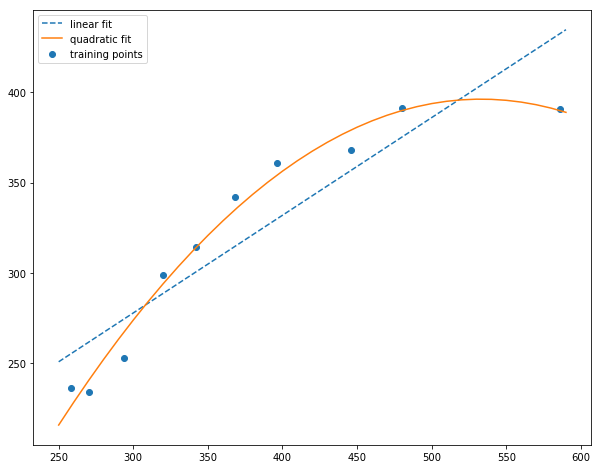

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit,  label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
y_lin_predict  = lr.predict(X)
y_quad_predict = pr.predict(X_quad)
print 'Training MSE linear: %.3f, quadratic: %.3f'%( mean_squared_error(y, y_lin_predict), mean_squared_error(y, y_quad_predict))
print 'Training R2 linear: %.3f, quadratic: %.3f'%( r2_score(y, y_lin_predict), r2_score(y, y_quad_predict)) 

Training MSE linear: 569.780, quadratic: 61.330
Training R2 linear: 0.832, quadratic: 0.982


### 2. Boston Housing example
Here performs the different polyminal features, e.g. quadratic and cubic.

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()

In [10]:
df =  pd.DataFrame( data=boston.data )
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df['MEDV'] = boston.target
X = df[['LSTAT']].values
y = df[['MEDV']].values # Add more [] to avoid getting WARNING in standardization

In [11]:
# Create polyminal features, guadratic and cubic
quadr = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quadr = quadr.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [12]:
# fitting
rl = LinearRegression().fit(X, y)
rq = LinearRegression().fit(X_quadr, y)
rc = LinearRegression().fit(X_cubic, y)

In [13]:
# get fitting line
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
y_lin_fit = rl.predict(X_fit)
y_qua_fit = rq.predict(quadr.fit_transform(X_fit))
y_cub_fit = rc.predict(cubic.fit_transform(X_fit))

In [14]:
# R2 score
lin_r2 = r2_score(y, rl.predict(X))
qua_r2 = r2_score(y, rq.predict(X_quadr))
cub_r2 = r2_score(y, rc.predict(X_cubic))
print 'R2 score linear: %.3f, quardratic: %.3f, cubic: %.3f'%(lin_r2, qua_r2, cub_r2)

R2 score linear: 0.544, quardratic: 0.641, cubic: 0.658


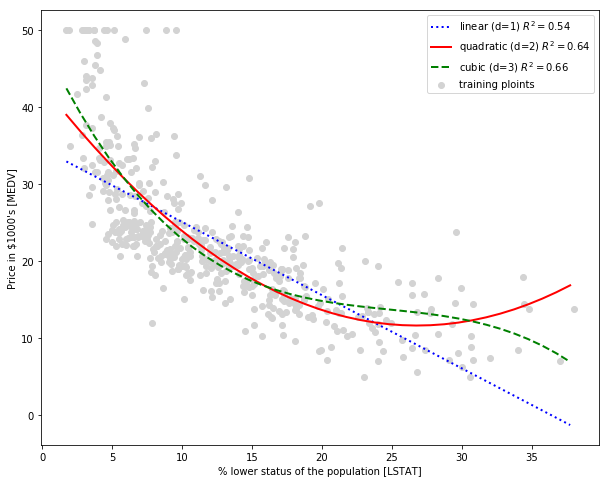

In [15]:
# plot results
plt.figure(figsize=(10,8))
plt.scatter(X, y, label='training ploints', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1) $R^2=%.2f$'% lin_r2,    color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_qua_fit, label='quadratic (d=2) $R^2=%.2f$'% qua_r2, color='red',  lw=2, linestyle='-')
plt.plot(X_fit, y_cub_fit, label='cubic (d=3) $R^2=%.2f$'% cub_r2,     color='green',lw=2, linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')
plt.show()

However, there the hiden correlation between LSAT and MEDV is actually linear when LSAT is in the *log-scale*, and MEDV is applied to square root, hense the polynomial transform may not be the coreect to fit.

In [17]:
# transfer features
X_log  = np.log(X)
y_sqrt = np.sqrt(y)

In [18]:
# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]
re = LinearRegression().fit(X_log, y_sqrt)
y_lin_fit = re.predict(X_fit)
re_r2 = r2_score(y_sqrt, re.predict(X_log))

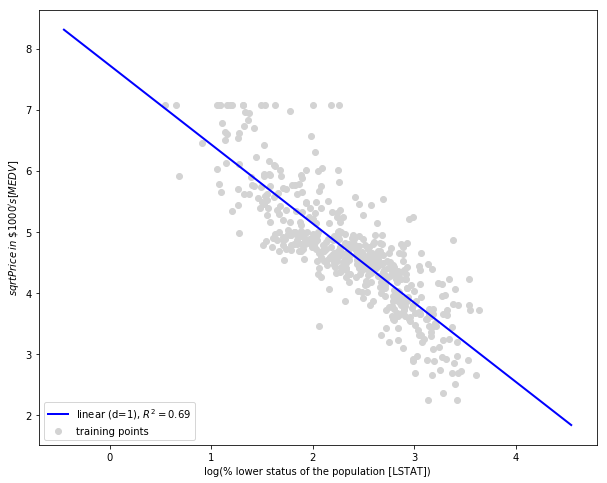

In [19]:
# plot
plt.figure(figsize=(10,8))
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$'% re_r2, color='blue', lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')
plt.show()